## PERCEPTRON USING LOGISTIC ACTIVATION

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [6]:
X,Y = make_blobs?

TypeError: cannot unpack non-iterable function object

In [ ]:
X1,Y1 = make_moons?

In [8]:
X1,Y1 = make_moons(n_samples=1000,shuffle=True, noise=0.2, random_state=1)

In [9]:
X,Y = make_blobs(n_samples=500, n_features=2,centers=2,random_state=9)

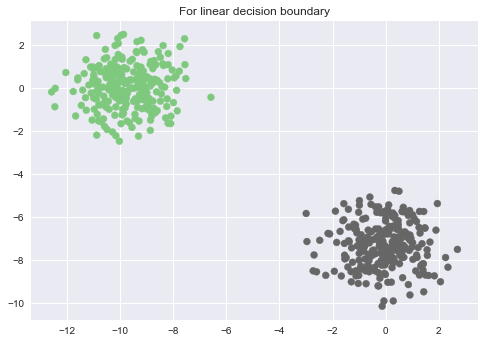

In [10]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.title("For linear decision boundary")
plt.show()

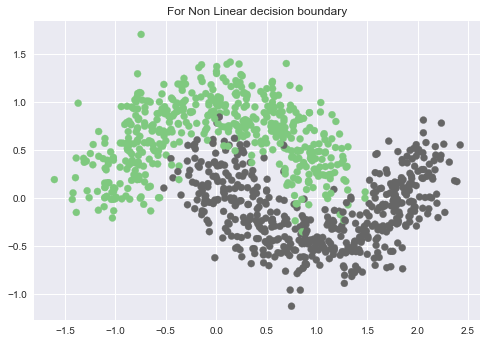

In [11]:
plt.style.use("seaborn")
plt.scatter(X1[:,0],X1[:,1],c = Y1,cmap = plt.cm.Accent)
plt.title("For Non Linear decision boundary")
plt.show()

## MODELS AND FUNCTIONS

In [12]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

## IMPLEMENT PERCEPTRON ALGORITHM

In [13]:
def predict(X,w):
    z = np.dot(X,w)
    prediction = sigmoid(z)
    return prediction
def loss(X,Y,w):
    Y_ = predict(X,w)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
def update(X,Y,w,alpha):
    Y_  = predict(X,w)
    dw = np.dot(X.T,Y_-Y)
    w = w  - alpha*dw/float(X.shape[0])
    return w
    
def train(X,Y,alpha,iterations):
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    
    w = np.zeros(X.shape[1])
    for i in range(iterations):
        w = update(X,Y,w,alpha)
        
        if(i%10==0):
            l = loss(X,Y,w)
#             print("%d epoch gives %.4f cost"%(i,l))
    return w
        
    

In [14]:
w = train(X,Y,0.5,1000)
w

array([ 0.0825608 ,  1.18847696, -1.49750873])

In [15]:
def getPredictions(X_test,w,label = True):
    if(X_test.shape[1]!=w.shape[0]):
        X_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
    prob = predict(X_test,w)
    
    if not label:
        return prob
    else:
        labels = np.zeros(prob.shape)
        labels[prob>=0.5] = 1
    return labels
        

In [17]:
x1 = np.arange(-10,2)
x2 = -(w[0]+x1*w[1])/w[2]

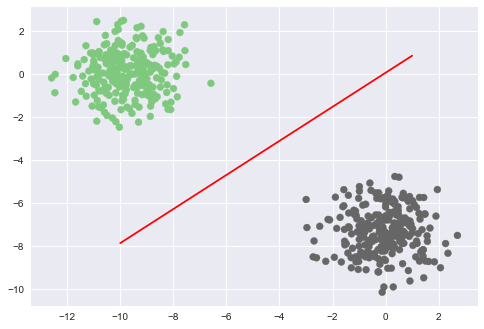

In [252]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.plot(x1,x2,'r')
plt.show()

In [18]:
model_acc = sum(getPredictions(X,w)==Y)/Y.shape[0]*100
print("Model Accuracy is {} %".format(model_acc))

Model Accuracy is 100.0 %


#  trying for non linear case 

In [268]:
w1 = train(X1,Y1,0.5,10000)

In [22]:
x1 = np.arange(-2,2.5)
x2 = -(w[0]+x1*w[1])/w[2]

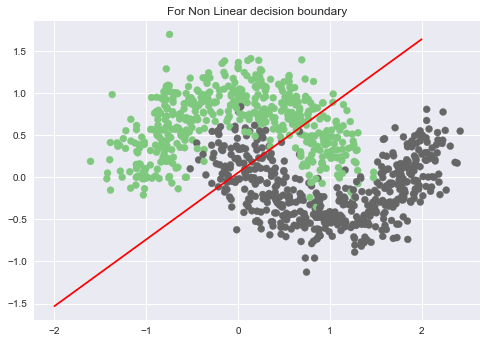

In [23]:
plt.style.use("seaborn")
plt.scatter(X1[:,0],X1[:,1],c = Y1,cmap = plt.cm.Accent)
plt.plot(x1,x2,color = "red")
plt.title("For Non Linear decision boundary")
plt.show()

In [274]:
model_acc1  = sum(getPredictions(X1,w1)==Y1)/Y1.shape[0]*100
print("Model Accuracy is {} %".format(model_acc1))

Model Accuracy is 86.9 %


## need to use Multilayer perceptron